# How to use the MCMC_output() class in pyigm.metallicity.MCMC_output

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from pyigm.metallicity.MCMC_output import MCMC_output

### Let's send a LIST of *.pkl/*.hd5 files of our MCMC output.
### We can send a single filename (a string), if we wish, also.

First, read in the list of *.pkl/*.hd5 files (the *.list file is
simply a list of the paths to those files).

This will include the entire sample, regardless of its NHI.
The class will only return the data for those within the specified NHI range.

That way, if we already have, e.g., a list of "all files we want to
  include in a 'metallicity vs NHI' plot" but want to grab the pLLSs
  by themselves, we can still send it the whole list.

In [3]:
##Read the list
listfile_files = []
with open('../Figures/plot-met_pdf-W17_MCMC.list', 'r') as infile:
    for line in infile:
        listfile_files.append(line.strip())

### Now initialize the class

In [4]:
##Now initialize the class
binsize=0.20
base_hist = np.arange(-3.6, 1.0001, binsize)
mcmc=MCMC_output(
    NHItype = 'LLS',
    binsize = binsize,
    base_hist = base_hist,
    smash = True,
    ndraw = 10000
    )

In [5]:
##Send it the file list. This could also have been
##  done above, with `infiles = listfile_files` argument
##  at class initialization, but I'm just showing you
##  that it works either way.
mcmc.infiles = listfile_files

## Call the class

In [6]:
##Call the class
LLS_walkers, LLS_nsys, LLS_limit_code = mcmc.get_walkers()
LLS_MDF, LLS_cumul_frac, LLS_nsys, base_hist, bins = mcmc.get_pdf_cdf()

In [7]:
##We can now change the options if we want, e.g., a different
##  NHI range.

##First, we need to reset NHItype, since that overrides
##  the NHIlow and NHIhigh
mcmc.NHItype = None

mcmc.NHIlow = 15.0
mcmc.NHIhigh= 19.0

In [8]:
##Re-call the class and get different walkers
pLLS_LLS_walkers, pLLS_LLS_nsys, pLLS_LLS_limit_code = mcmc.get_walkers()
pLLS_LLS_MDF, pLLS_LLS_cumul_frac, pLLS_LLS_nsys, base_hist, bins = mcmc.get_pdf_cdf()

### Let's make some example plots

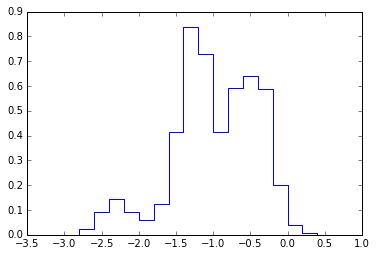

In [9]:
plt.plot(bins, LLS_MDF, drawstyle='steps-mid')
plt.show()

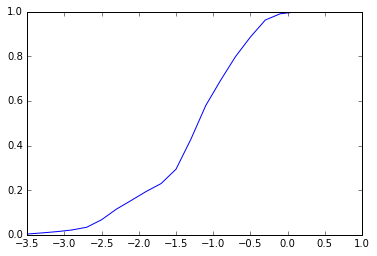

In [10]:
plt.plot(bins, pLLS_LLS_cumul_frac)
plt.show()